# Gen Python API Tutorial

This notebook demonstrates how to use the Gen Python API for graph-based genomic data management with git-like versioning capabilities. We start off by initializing a new repository:


In [1]:
import gen

repo = gen.Repository()


This searches the current working directory for a `.gen` folder that holds the data and operations infrastructure. If no existing repository was found, a new .gen folder and database will be created.  You can also load a local repository that is outside of the present working directory by specifying the location of its .gen folder.

In [2]:
repo = gen.Repository('../.gen/')

The repository can be queried directly, or through the methods shown in the next section.

In [6]:
result = repo.query("SELECT COUNT(*) FROM block_groups")
print(f"Number of block groups: {result[0][0]}")

Number of block groups: 18


## Working with Graphs

Gen organizes genomic data in graphs. Let's explore how to access and work with graphs. Internally, these are called block_groups. (TODO: expose as graph/region/contig/..., not block_group)

In [4]:
collection_contents = repo.get_block_groups_by_collection('default')
display(collection_contents)


[BlockGroup(1, default, None, ref|NC_001133|),
 BlockGroup(2, default, None, ref|NC_001134|),
 BlockGroup(3, default, None, ref|NC_001135|),
 BlockGroup(4, default, None, ref|NC_001136|),
 BlockGroup(5, default, None, ref|NC_001137|),
 BlockGroup(6, default, None, ref|NC_001138|),
 BlockGroup(7, default, None, ref|NC_001139|),
 BlockGroup(8, default, None, ref|NC_001140|),
 BlockGroup(9, default, None, ref|NC_001141|),
 BlockGroup(10, default, None, ref|NC_001142|),
 BlockGroup(11, default, None, ref|NC_001143|),
 BlockGroup(12, default, None, ref|NC_001144|),
 BlockGroup(13, default, None, ref|NC_001145|),
 BlockGroup(14, default, None, ref|NC_001146|),
 BlockGroup(15, default, None, ref|NC_001147|),
 BlockGroup(16, default, None, ref|NC_001148|),
 BlockGroup(17, default, None, ref|NC_001224|),
 BlockGroup(18, default, None, U00096.3)]

## Networkx
Arguably the most popular graph library for Python

Converted to NetworkX graph with 3 nodes and 2 edges
Average node degree: 1.33


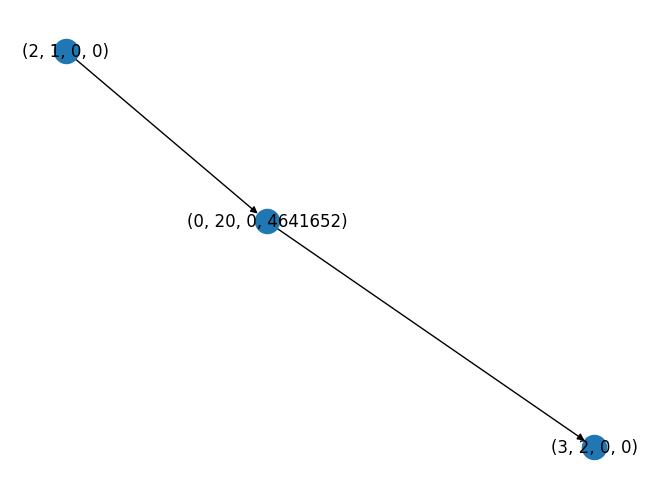

In [33]:
try:
    import networkx as nx
    import matplotlib.pyplot as plt

    nx_repr = repo.block_group_to_networkx(collection_contents[-1])
    print(f"Converted to NetworkX graph with {nx_repr.number_of_nodes()} nodes and {nx_repr.number_of_edges()} edges")
    
    # Analyze the graph
    if nx_repr.number_of_nodes() > 0:
        # Get node degrees
        degrees = [nx_repr.degree(n) for n in nx_repr.nodes()]
        avg_degree = sum(degrees) / len(degrees) if degrees else 0
        print(f"Average node degree: {avg_degree:.2f}")

    # Draw the graph
    plt.figure()
    nx.draw(nx_repr, with_labels=True)
    plt.show()
        
except ImportError:
    print("NetworkX not installed. Install with: pip install networkx")

## RustworkX
Similar to NetworkX but built on Rust under the hood.

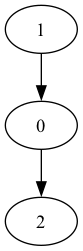

In [37]:
try:
    import rustworkx as rx
    import rustworkx.visualization as rxv

    rx_repr = repo.block_group_to_rustworkx(collection_contents[-1])

    display(rxv.graphviz_draw(rx_repr))

except ImportError:
    print("RustworkX not installed. Install with: pip install rustworkx")




## Dictionary

In [18]:
dict_repr = repo.block_group_to_dict(collection_contents[-1])
print("Edges in the form of pairs of block identifier tuples (block_id, node_id, start, end):")
display(dict_repr['edges'])


print("Node identifiers are also stored as node attributes:")
display(dict_repr['nodes'])

Edges in the form of pairs of block identifier tuples (block_id, node_id, start, end):


{((2, 1, 0, 0), (0, 20, 0, 4641652)): {'edge_id': 35,
  'source_strand': '+',
  'target_strand': '+',
  'chromosome_index': 0,
  'phased': 0},
 ((0, 20, 0, 4641652), (3, 2, 0, 0)): {'edge_id': 36,
  'source_strand': '+',
  'target_strand': '+',
  'chromosome_index': 0,
  'phased': 0}}

Node identifiers are also stored as node attributes:


{(0, 20, 0, 4641652): {'block_id': 0,
  'node_id': 20,
  'sequence_start': 0,
  'sequence_end': 4641652},
 (2, 1, 0, 0): {'block_id': 2,
  'node_id': 1,
  'sequence_start': 0,
  'sequence_end': 0},
 (3, 2, 0, 0): {'block_id': 3,
  'node_id': 2,
  'sequence_start': 0,
  'sequence_end': 0}}